# Проверка устойчивости индикатора

## Корреляция между индикаторами, построенными на основе различных моделей сентимент-анализа

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib import rcParams

rcParams["font.family"] = "serif"
rcParams["font.serif"] = "Times New Roman"
rcParams["font.size"] = 14

In [4]:
m={'mnb': 'MNB', 'lr': 'LR', 'svc': 'SVC', 
             'rf': 'RF', 'xgb': 'XGBoost', 'CNN': 'CNN', 'LSTM': 'LSTM', 'GRU':'GRU', 
             'RuBERT_1000': 'RuBERT (1000)', 'RuBERT_7000': 'RuBERT (7000)'}

### Для индикаторов с ежедневной частотой

In [6]:
data=pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_d_{model_name}.csv'
    df=pd.read_csv(path)
    data[m[model_name]]=df['indicator']

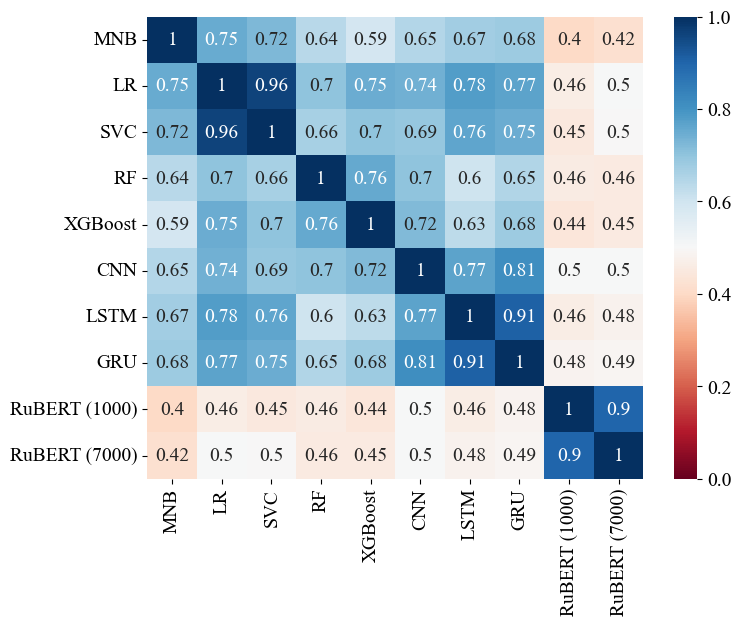

In [7]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='RdBu', vmin=0)
plt.show()

### Для индикаторов с ежемесячной частотой

In [9]:
data=pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_m_{model_name}.csv'
    df=pd.read_csv(path)
    data[m[model_name]]=df['indicator']

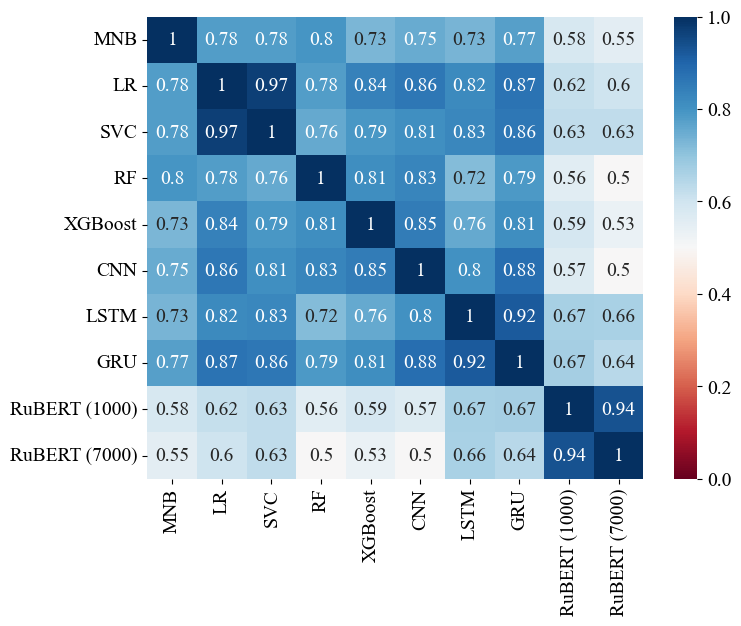

In [10]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='RdBu', vmin=0)
plt.show()

### Для индикаторов с годовой частотой

In [12]:
data=pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_y_{model_name}.csv'
    df=pd.read_csv(path)
    data[m[model_name]]=df['indicator']

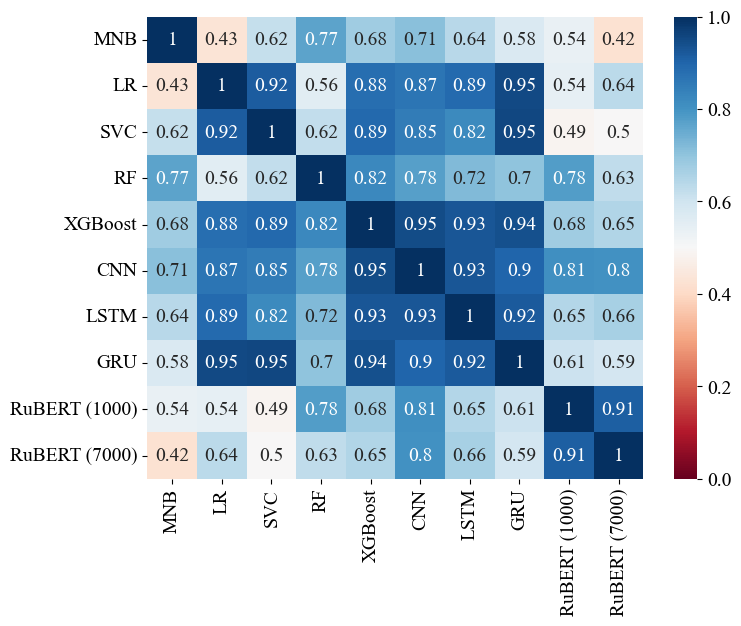

In [13]:
plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data.corr(), annot=True, cmap='RdBu', vmin=0)
plt.show()

## Корреляция между ежемесячными индикаторами, полученными для каждой модели сентимент-анализа при использовании двух разных способов формирования единого показателя тональности
Первый способ: единый показатель тональности = Ppos-Pneg

Второй способ: единый показатель тональности = метка класса (-1 для негативного, 0 для нейтрального, 1 для позитивного)

In [15]:
corr = []
method_corr = pd.DataFrame()
for model_name in m.keys():
    path = f'indicator_m_{model_name}.csv'
    df = pd.read_csv(path)
    corr.append(df[['indicator', 'indicator2']].corr().iloc[0,1])
method_corr = pd.DataFrame(corr)
method_corr.index = list(m.values())

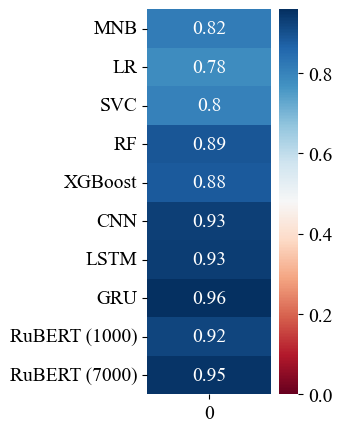

In [16]:
plt.figure(figsize=(2, 5))
heatmap = sns.heatmap(method_corr, annot=True, cmap='RdBu', vmin=0)
plt.show()